# Sales Data Analysis 2023
## Business-Oriented Exploratory Data Analysis

### Business Context
Sebagai data analyst, tujuan analisis ini adalah untuk memahami performa penjualan tahun 2023 guna membantu manajemen dalam:
- Mengoptimalkan revenue
- Mengidentifikasi produk unggulan
- Mengevaluasi performa store
- Mendeteksi anomali penjualan

Analisis dilakukan menggunakan Python (pandas & matplotlib) di Google Colab.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('datasales.csv')
df.head()

,order_id,date,store,product,quantity,sales
0,1,1/1/2023,Lower Manhattan,Gourmet brewed coffee,2,6.0
1,2,1/1/2023,Lower Manhattan,Brewed Chai tea,2,6.2
2,3,1/1/2023,Lower Manhattan,Hot chocolate,2,9.0
3,4,1/1/2023,Lower Manhattan,Drip coffee,1,2.0
4,5,1/1/2023,Lower Manhattan,Brewed Chai tea,2,6.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  149116 non-null  int64  
 1   date      149116 non-null  object 
 2   store     149116 non-null  object 
 3   product   149116 non-null  object 
 4   quantity  149116 non-null  int64  
 5   sales     149116 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.8+ MB


## Data Structure Overview

Dataset terdiri dari 149,116 transaksi penjualan dengan 6 variabel utama.

Tidak ditemukan missing values pada seluruh kolom, sehingga dataset dapat langsung digunakan untuk analisis tanpa proses data cleaning tambahan.

Kolom `date` masih bertipe object dan memerlukan konversi ke datetime agar dapat dilakukan analisis berbasis waktu seperti tren harian dan bulanan.

Variabel `quantity` dan `sales` bertipe numerik sehingga siap digunakan untuk perhitungan agregasi dan analisis statistik.

In [18]:
df.describe()

,order_id,quantity,sales
count,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,4.686367
std,43153.600016,0.542509,4.227099
min,1.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000
50%,74727.500000,1.000000,3.750000
75%,112094.250000,2.000000,6.000000
max,149456.000000,8.000000,360.000000


## Statistical Summary Analysis

Berdasarkan analisis deskriptif statistik:

Mayoritas transaksi memiliki quantity sebesar 1 unit dengan rata-rata 1.43 unit per transaksi. Hal ini menunjukkan bahwa pola pembelian bersifat individual dan bukan pembelian dalam jumlah besar.

Pada variabel sales, terdapat perbedaan signifikan antara nilai median (3.75) dan nilai maksimum (360). Selain itu, nilai mean (4.68) lebih tinggi dari median, yang mengindikasikan distribusi data bersifat right-skewed.

Hal ini menunjukkan adanya kemungkinan outlier atau transaksi dalam jumlah besar yang perlu dianalisis lebih lanjut menggunakan metode deteksi outlier.

In [19]:
df.isnull().sum()

,0
order_id,0
date,0
store,0
product,0
quantity,0
sales,0


## Missing Value Analysis

Berdasarkan pengecekan missing values, seluruh variabel memiliki nilai 0 pada setiap kolom.

Hal ini menunjukkan bahwa dataset dalam kondisi lengkap tanpa data yang hilang (missing values), sehingga tidak diperlukan proses data cleaning tambahan seperti imputasi atau penghapusan data.

Kondisi ini meningkatkan reliabilitas analisis karena seluruh transaksi tercatat secara utuh.

In [20]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

df.head()

,order_id,date,store,product,quantity,sales,year,month,day,weekday
0,1,2023-01-01,Lower Manhattan,Gourmet brewed coffee,2,6.0,2023,1,1,Sunday
1,2,2023-01-01,Lower Manhattan,Brewed Chai tea,2,6.2,2023,1,1,Sunday
2,3,2023-01-01,Lower Manhattan,Hot chocolate,2,9.0,2023,1,1,Sunday
3,4,2023-01-01,Lower Manhattan,Drip coffee,1,2.0,2023,1,1,Sunday
4,5,2023-01-01,Lower Manhattan,Brewed Chai tea,2,6.2,2023,1,1,Sunday


## Feature Engineering

Kolom `date` berhasil dikonversi menjadi tipe datetime dan digunakan untuk membuat variabel turunan berupa year, month, day, dan weekday.

Feature engineering ini memungkinkan analisis berbasis waktu seperti tren harian, pola bulanan, serta identifikasi hari dengan performa penjualan tertinggi.

Dari hasil konversi, tanggal pertama (2023-01-01) teridentifikasi sebagai Sunday, yang menunjukkan proses parsing tanggal telah berhasil dilakukan dengan benar.

In [26]:
#DATA WRANGLING: DAILY AGGREGATION
#q1:Bagaimana tren revenue harian sepanjang tahun 2023?

daily_sales = df.groupby('date').agg(
    total_sales=('sales', 'sum'),
    total_quantity=('quantity', 'sum'),
    total_orders=('order_id', 'count')
).reset_index()

daily_sales.head()

,date,total_sales,total_quantity,total_orders
0,2023-01-01,2508.20,802,550
1,2023-01-02,2403.35,790,566
2,2023-01-03,2565.00,823,582
3,2023-01-04,2220.10,726,497
4,2023-01-05,2418.85,778,547


## Daily Aggregation Analysis

Hasil agregasi menunjukkan bahwa revenue harian berada pada kisaran 2,200 hingga 2,600 pada awal periode analisis.

Fluktuasi revenue terlihat sejalan dengan perubahan jumlah transaksi (total_orders), yang menunjukkan bahwa performa harian sangat dipengaruhi oleh volume transaksi.

Rata-rata jumlah item per transaksi sekitar 1.4 unit, yang konsisten dengan hasil analisis deskriptif sebelumnya. Hal ini mengindikasikan pola pembelian bersifat individual dan bukan dalam jumlah besar.

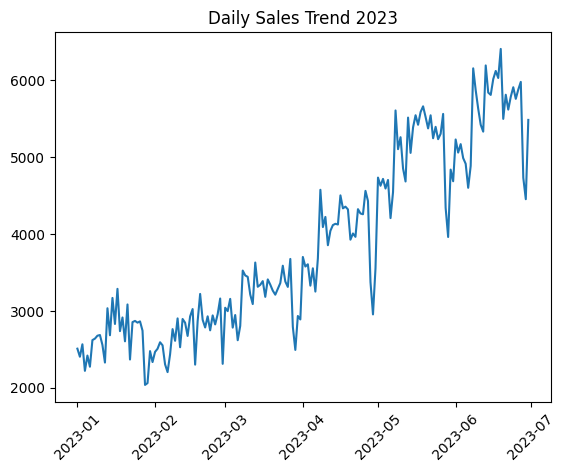

In [27]:
plt.figure()
plt.plot(daily_sales['date'], daily_sales['total_sales'])
plt.xticks(rotation=45)
plt.title("Daily Sales Trend 2023")
plt.show()

## Daily Sales Trend Analysis

Visualisasi menunjukkan adanya tren peningkatan revenue yang konsisten sepanjang periode analisis.

Revenue harian meningkat secara bertahap dari kisaran 2,400 pada awal periode menjadi lebih dari 6,000 pada pertengahan tahun.

Hal ini mengindikasikan adanya pertumbuhan bisnis yang positif, baik dari sisi peningkatan jumlah transaksi maupun nilai transaksi.

Selain tren kenaikan, terlihat pula fluktuasi harian yang cukup signifikan. Fluktuasi ini dapat dipengaruhi oleh faktor seperti perbedaan hari dalam minggu, periode promosi, atau event tertentu.

Identifikasi lebih lanjut terhadap pola musiman dan performa berdasarkan weekday diperlukan untuk memahami faktor pendorong utama peningkatan revenue tersebut.

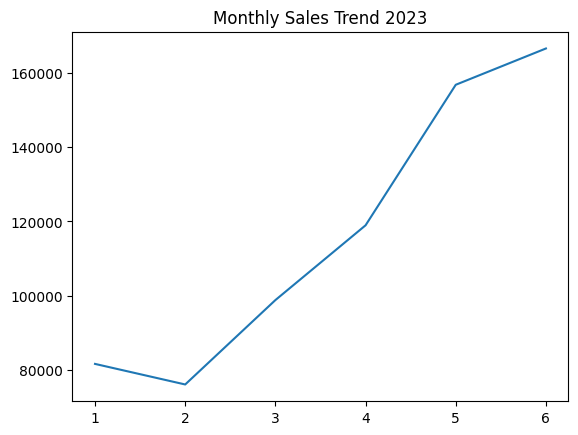

,month,sales
0,1,81677.74
1,2,76145.19
2,3,98834.68
3,4,118941.08
4,5,156727.76
5,6,166485.88


In [28]:
#q2:Apakah pertumbuhan ini konsisten setiap bulan?
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

plt.figure()
plt.plot(monthly_sales['month'], monthly_sales['sales'])
plt.title("Monthly Sales Trend 2023")
plt.show()

monthly_sales

## Monthly Sales Analysis

Revenue bulanan menunjukkan tren pertumbuhan yang signifikan sepanjang periode analisis.

Meskipun terjadi sedikit penurunan pada bulan Februari, kemungkinan disebabkan oleh jumlah hari yang lebih sedikit, performa penjualan kembali meningkat secara konsisten mulai bulan Maret hingga Juni.

Kenaikan paling signifikan terjadi pada periode April hingga Mei, yang menunjukkan adanya percepatan pertumbuhan revenue.

Tren ini mengindikasikan pertumbuhan bisnis yang positif dan dapat menjadi dasar evaluasi strategi pemasaran atau operasional yang telah diterapkan pada periode tersebut.

In [29]:
#Month-to-Month Growth Rate
monthly_sales['growth_rate_%'] = monthly_sales['sales'].pct_change() * 100
monthly_sales

,month,sales,growth_rate_%
0,1,81677.74,NaN
1,2,76145.19,-6.773633
2,3,98834.68,29.797667
3,4,118941.08,20.343466
4,5,156727.76,31.769242
5,6,166485.88,6.226159


## Month-to-Month Growth Analysis

Analisis pertumbuhan bulanan menunjukkan adanya peningkatan revenue yang signifikan sepanjang periode observasi.

Meskipun terjadi penurunan sebesar 6.77% pada bulan Februari, pertumbuhan kembali terjadi secara kuat mulai bulan Maret dengan kenaikan hampir 30%.

Pertumbuhan tertinggi terjadi pada bulan Mei sebesar 31.77%, yang mengindikasikan adanya percepatan peningkatan demand atau efektivitas strategi bisnis pada periode tersebut.

Secara keseluruhan, revenue hampir meningkat dua kali lipat dalam enam bulan pertama, yang menunjukkan performa bisnis yang sangat positif.

In [30]:
#DATA WRANGLING: STORE AGGREGATION
#q3:Store mana yang paling berkontribusi terhadap total revenue?
store_sales = df.groupby('store').agg(
    total_sales=('sales', 'sum'),
    avg_sales=('sales', 'mean'),
    total_quantity=('quantity', 'sum')
).reset_index()

store_sales

,store,total_sales,avg_sales,total_quantity
0,Astoria,232243.91,4.589891,70991
1,Hell's Kitchen,236511.17,4.661696,71737
2,Lower Manhattan,230057.25,4.814726,71742


## Store Performance Analysis

Analisis menunjukkan bahwa ketiga store memiliki performa yang relatif seimbang dari sisi total revenue.

Hell's Kitchen mencatat total revenue tertinggi, sementara Lower Manhattan memiliki rata-rata nilai transaksi tertinggi.

Perbedaan ini mengindikasikan adanya variasi karakteristik pelanggan atau komposisi produk yang terjual di masing-masing store.

Secara keseluruhan, tidak terdapat kesenjangan performa yang signifikan antar store, yang menunjukkan distribusi demand yang cukup merata.

In [31]:
#q4:Store mana menyumbang berapa persen dari total revenue?
total_revenue = store_sales['total_sales'].sum()

store_sales['contribution_%'] = (store_sales['total_sales'] / total_revenue) * 100

store_sales

,store,total_sales,avg_sales,total_quantity,contribution_%
0,Astoria,232243.91,4.589891,70991,33.234089
1,Hell's Kitchen,236511.17,4.661696,71737,33.844733
2,Lower Manhattan,230057.25,4.814726,71742,32.921178


## Revenue Contribution per Store

Kontribusi revenue dari ketiga store relatif seimbang, masing-masing menyumbang sekitar 33% dari total revenue.

Hell's Kitchen memberikan kontribusi tertinggi sebesar 33.84%, diikuti oleh Astoria dan Lower Manhattan dengan selisih yang sangat kecil.

Distribusi revenue yang merata ini menunjukkan bahwa performa bisnis tidak terpusat pada satu cabang tertentu, sehingga risiko ketergantungan terhadap satu lokasi relatif rendah.

Hal ini mencerminkan stabilitas operasional dan konsistensi permintaan di seluruh store.

In [32]:
#q5: Produk mana yang paling berkontribusi terhadap revenue?
product_sales = df.groupby('product').agg(
    total_sales=('sales', 'sum'),
    total_quantity=('quantity', 'sum'),
    avg_sales=('sales', 'mean')
).reset_index().sort_values(by='total_sales', ascending=False)

product_sales.head(10)

,product,total_sales,total_quantity,avg_sales
0,Barista Espresso,91406.20,24943,5.572529
4,Brewed Chai tea,77081.95,26250,4.485943
17,Hot chocolate,72416.00,17457,6.314615
13,Gourmet brewed coffee,70034.60,25973,4.141119
3,Brewed Black tea,47932.00,17462,4.223084
6,Brewed herbal tea,47539.50,17328,4.227612
25,Premium brewed coffee,38781.15,12431,4.767197
22,Organic brewed coffee,37746.50,13012,4.446519
27,Scone,36866.12,10465,3.623918
10,Drip coffee,31984.00,12891,3.773033


## Top Product Performance Analysis

Berdasarkan total revenue, Barista Espresso merupakan produk dengan kontribusi tertinggi terhadap pendapatan perusahaan.

Meskipun Brewed Chai Tea memiliki jumlah penjualan (quantity) tertinggi, nilai rata-rata transaksi Barista Espresso lebih tinggi, sehingga menghasilkan total revenue yang lebih besar.

Hal ini menunjukkan adanya perbedaan antara produk yang menjadi volume driver dan revenue driver.

Produk seperti Brewed Chai Tea dan Gourmet Brewed Coffee berperan sebagai pendorong volume penjualan, sementara Barista Espresso dan Hot Chocolate berkontribusi signifikan terhadap revenue melalui nilai transaksi yang lebih tinggi.

Strategi bisnis dapat difokuskan pada optimalisasi produk revenue driver melalui promosi bundling atau upselling untuk meningkatkan nilai transaksi rata-rata.

In [33]:
# q6:Produk mana yang paling profitable jika dilihat dari kontribusi persentase terhadap total revenue?
total_revenue = product_sales['total_sales'].sum()
product_sales['contribution_%'] = (product_sales['total_sales'] / total_revenue) * 100

product_sales.head(10)

,product,total_sales,total_quantity,avg_sales,contribution_%
0,Barista Espresso,91406.20,24943,5.572529,13.080221
4,Brewed Chai tea,77081.95,26250,4.485943,11.030422
17,Hot chocolate,72416.00,17457,6.314615,10.362725
13,Gourmet brewed coffee,70034.60,25973,4.141119,10.021947
3,Brewed Black tea,47932.00,17462,4.223084,6.859066
6,Brewed herbal tea,47539.50,17328,4.227612,6.802899
25,Premium brewed coffee,38781.15,12431,4.767197,5.549580
22,Organic brewed coffee,37746.50,13012,4.446519,5.401522
27,Scone,36866.12,10465,3.623918,5.275539
10,Drip coffee,31984.00,12891,3.773033,4.576908


## Product Revenue Contribution Analysis

Empat produk teratas menyumbang hampir 45% dari total revenue perusahaan, dengan Barista Espresso sebagai kontributor terbesar sebesar 13.08%.

Meskipun terdapat beberapa produk unggulan, distribusi revenue secara keseluruhan masih relatif terdiversifikasi dan tidak terpusat pada satu produk saja.

Hal ini menunjukkan struktur portofolio produk yang sehat dan tidak bergantung pada satu sumber pendapatan utama.

Produk seperti Barista Espresso dan Brewed Chai Tea berperan sebagai revenue driver utama, sementara produk lain memberikan kontribusi stabil terhadap total pendapatan perusahaan.

In [34]:
#q7:Hari apa yang paling menghasilkan revenue?
weekday_sales = df.groupby('weekday')['sales'].sum().reset_index()

weekday_sales

,weekday,sales
0,Friday,101373.00
1,Monday,101677.28
2,Saturday,96894.48
3,Sunday,98330.31
4,Thursday,100767.78
5,Tuesday,99455.94
6,Wednesday,100313.54


## Weekday Performance Analysis

Analisis menunjukkan bahwa revenue tertinggi terjadi pada hari Senin, diikuti oleh Jumat dan Kamis.

Hal ini mengindikasikan bahwa permintaan cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan.

Perbedaan revenue antar hari tidak terlalu signifikan, yang menunjukkan pola permintaan yang relatif stabil sepanjang minggu.

Temuan ini mengindikasikan bahwa bisnis kemungkinan besar didominasi oleh pelanggan pada hari kerja, sehingga strategi operasional seperti pengaturan tenaga kerja dan promosi dapat difokuskan pada periode weekday untuk optimalisasi performa.

In [35]:
#OUTLIER DETECTION (IQR METHOD)
#q8:Apakah outlier signifikan atau tidak terhadap total revenue?
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]

len(outliers)

3273

In [36]:
#q9:Seberapa Besar Outlier-nya?
outlier_percentage = (len(outliers) / len(df)) * 100
outlier_percentage

2.1949354864669117

Besar Presentase Outliernya Hanya sekitar 2% dari total transaksi.

#Pertanyaan Penting
Apakah outlier ini:
- Mengganggu analisis?
- Atau justru bagian dari bisnis (bulk order)?

Untuk jawab ini, kita perlu lihat dampaknya terhadap total revenue.

In [37]:
#Bandingkan total revenue sebelum dan sesudah remove outlier:
# Total revenue original
total_revenue_original = df['sales'].sum()

# Remove outliers
df_clean = df[(df['sales'] >= lower_bound) & (df['sales'] <= upper_bound)]

# Total revenue setelah remove outlier
total_revenue_clean = df_clean['sales'].sum()

total_revenue_original, total_revenue_clean

(np.float64(698812.3300000002), np.float64(635374.34))

## Outlier Impact Analysis

Hasil deteksi menunjukkan terdapat 3,273 transaksi (sekitar 2.19% dari total data) yang dikategorikan sebagai outlier berdasarkan metode IQR.

Namun, transaksi tersebut menyumbang sekitar 9% dari total revenue perusahaan.

Hal ini menunjukkan bahwa meskipun jumlahnya relatif kecil, transaksi bernilai tinggi memiliki kontribusi yang signifikan terhadap pendapatan.

Dalam konteks bisnis, outlier ini kemungkinan merepresentasikan transaksi dalam jumlah besar atau pembelian bernilai tinggi, sehingga tidak dapat serta-merta dihapus dari analisis.

Oleh karena itu, analisis utama tetap menggunakan dataset original untuk menjaga representasi performa bisnis yang sebenarnya.

# Executive Summary

Analisis ini dilakukan untuk memahami performa penjualan tahun 2023 dengan tujuan memberikan insight strategis bagi manajemen dalam mengoptimalkan revenue, mengevaluasi performa store, serta mengidentifikasi produk unggulan.

## Key Findings

### 1. Business Growth Trend
Revenue menunjukkan tren pertumbuhan yang konsisten sepanjang periode observasi. Meskipun terjadi penurunan kecil pada bulan Februari (-6.77%), pertumbuhan kembali meningkat secara signifikan mulai bulan Maret.

Pertumbuhan tertinggi terjadi pada bulan Mei (+31.77%), dan secara keseluruhan revenue hampir meningkat dua kali lipat dalam enam bulan pertama.

Hal ini mengindikasikan adanya ekspansi permintaan atau efektivitas strategi bisnis yang berjalan.


### 2. Store Performance Stability
Kontribusi revenue antar store relatif seimbang:

- Hell's Kitchen: 33.84%
- Astoria: 33.23%
- Lower Manhattan: 32.92%

Distribusi revenue yang merata menunjukkan tidak adanya ketergantungan berlebihan pada satu cabang tertentu, yang mencerminkan stabilitas operasional dan diversifikasi risiko yang baik.


### 3. Product Portfolio Structure
Empat produk teratas menyumbang hampir 45% dari total revenue, dengan Barista Espresso sebagai kontributor terbesar (13.08%).

Analisis menunjukkan adanya dua kategori utama:
- Volume driver (produk dengan frekuensi pembelian tinggi)
- Revenue driver (produk dengan nilai transaksi lebih tinggi)

Struktur ini menunjukkan portofolio produk yang sehat dan terdiversifikasi.


### 4. Weekday Performance Pattern
Revenue cenderung lebih tinggi pada hari kerja, dengan Senin sebagai hari dengan performa tertinggi.

Hal ini mengindikasikan bahwa bisnis kemungkinan besar didorong oleh pelanggan weekday, sehingga strategi operasional dan promosi dapat difokuskan pada periode tersebut.


### 5. Outlier Impact
Sebanyak 2.19% transaksi teridentifikasi sebagai outlier, namun transaksi tersebut menyumbang sekitar 9% dari total revenue.

Hal ini menunjukkan bahwa transaksi bernilai tinggi memiliki kontribusi signifikan terhadap pendapatan dan tidak dapat diabaikan dalam analisis bisnis.


## Strategic Implications

Berdasarkan temuan tersebut, perusahaan dapat mempertimbangkan:

- Mempertahankan strategi pertumbuhan yang telah berjalan efektif.
- Mengoptimalkan produk revenue driver melalui strategi upselling dan bundling.
- Memaksimalkan potensi weekday melalui promosi yang lebih terarah.
- Mempertahankan stabilitas performa antar store melalui standar operasional yang konsisten.
- Mengidentifikasi pola transaksi bernilai tinggi untuk strategi enterprise atau bulk-order.

Secara keseluruhan, bisnis menunjukkan pertumbuhan yang positif, struktur revenue yang terdiversifikasi, serta stabilitas operasional yang baik.

## Strategic Recommendations

Berdasarkan hasil analisis data, berikut rekomendasi strategis yang dapat dipertimbangkan manajemen:

### 1. Maksimalkan Produk Revenue Driver
Barista Espresso, Brewed Chai Tea, dan Hot Chocolate merupakan kontributor utama revenue.

Rekomendasi:
- Terapkan strategi bundling (misalnya kombinasi minuman + pastry).
- Lakukan upselling oleh barista pada jam sibuk.
- Soroti produk dengan avg_sales tinggi sebagai premium highlight.

Tujuan: Meningkatkan average transaction value (ATV).

### 2. Optimasi Performa Weekday
Revenue cenderung lebih tinggi pada hari kerja, terutama Senin.

Rekomendasi:
- Fokuskan tenaga kerja tambahan pada weekday peak hours.
- Luncurkan campaign "Monday Boost" untuk mempertahankan momentum awal minggu.
- Targetkan pelanggan pekerja kantoran melalui promosi pagi hari.

Tujuan: Memaksimalkan revenue pada periode dengan demand tertinggi.

### 3. Tingkatkan Performa Weekend
Revenue weekend relatif lebih rendah dibanding weekday.

Rekomendasi:
- Adakan promo khusus weekend (diskon bundle keluarga, promo buy 2 get 1).
- Aktivasi social media campaign untuk menarik traffic akhir pekan.
- Evaluasi jam operasional dan staffing efficiency.

Tujuan: Mengurangi gap performa antara weekday dan weekend.


### 4. Pertahankan Diversifikasi Store
Kontribusi revenue antar store relatif seimbang (~33%).

Rekomendasi:
- Pertahankan standar operasional yang konsisten antar cabang.
- Lakukan benchmarking performa produk antar store untuk identifikasi peluang peningkatan.
- Evaluasi potensi ekspansi dengan model operasional yang sama.

Tujuan: Menjaga stabilitas dan mengurangi risiko ketergantungan pada satu lokasi.


### 5. Manfaatkan Transaksi Bernilai Tinggi (Outlier)
Meskipun hanya 2.19% transaksi, outlier menyumbang sekitar 9% revenue.

Rekomendasi:
- Identifikasi pola transaksi besar (apakah corporate order, event, atau bulk purchase).
- Pertimbangkan program khusus untuk pelanggan volume tinggi.
- Buat kategori pelanggan enterprise untuk repeat bulk order.

Tujuan: Mengembangkan segmen pelanggan bernilai tinggi secara strategis.


### 6. Monitoring Growth Sustainability
Pertumbuhan signifikan terjadi antara Maret hingga Mei.

Rekomendasi:
- Analisis lebih lanjut faktor penyebab pertumbuhan (promo, event, ekspansi).
- Replikasi strategi sukses pada periode selanjutnya.
- Monitor growth rate bulanan untuk mendeteksi potensi perlambatan lebih awal.

Tujuan: Menjaga pertumbuhan tetap berkelanjutan.